# CONVOLUTIONAL NEURAL NETWORK (CNN) BASICS

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

==========

## MNIST "Modified National Institute of Standards and Technology" (Handwritten Digits) | Convolutional Neural Network (CNN) Case-study

MNIST Dataset: http://yann.lecun.com/exdb/mnist/

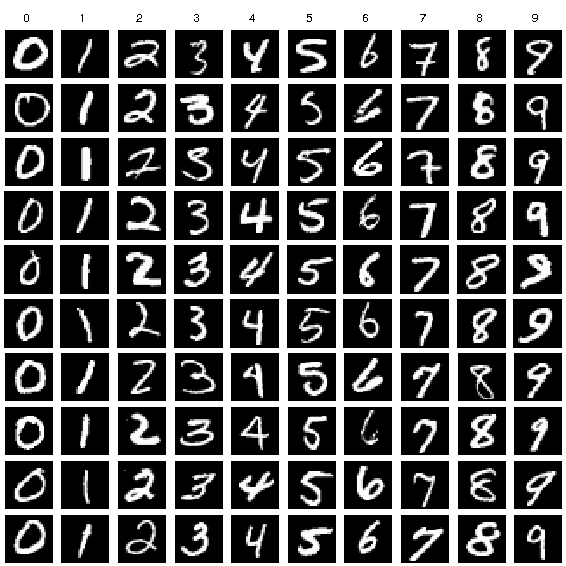

In [3]:
from IPython.display import Image
Image('imgs/MNIST.png') 

### Loading & Inspecting Data

In [4]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train[0].shape

(28, 28)

In [7]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Exploring Data

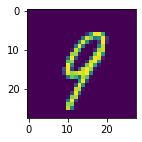

In [11]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[22,:,:])
plt.show()

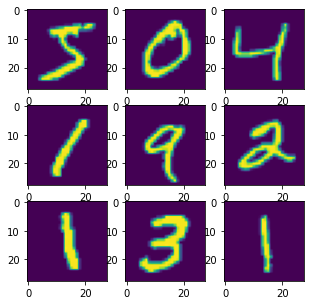

In [12]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i,:,:])

### Preparing Data

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
X_train = X_train.reshape((60000, 28, 28, 1)) # reshaping
X_train = X_train.astype('float32') / 255 # normalizing

In [15]:
X_train.shape

(60000, 28, 28, 1)

In [19]:
# X_train

In [17]:
X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

In [18]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

==========

### 1] Using Convolutional Neural Network (CNN)

Image Kernel Demo: https://setosa.io/ev/image-kernels/

CNN Demo: https://adamharley.com/nn_vis/cnn/3d.html

##### Model Building

In [20]:
from keras import layers
from keras import models

In [21]:
cnn = models.Sequential()

# feature extraction
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(layers.MaxPooling2D((2, 2)))

cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))

cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))

# fully-connected layer
cnn.add(layers.Flatten())
cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))

In [22]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [23]:
cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

##### Model Training

In [24]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 21s 22ms/step - loss: 0.1632 - accuracy: 0.9483
Epoch 2/5
938/938 [==============================] - 21s 22ms/step - loss: 0.0460 - accuracy: 0.9854
Epoch 3/5
938/938 [==============================] - 22s 23ms/step - loss: 0.0321 - accuracy: 0.9898
Epoch 4/5
938/938 [==============================] - 22s 24ms/step - loss: 0.0256 - accuracy: 0.9920
Epoch 5/5
938/938 [==============================] - 22s 23ms/step - loss: 0.0196 - accuracy: 0.9940


##### Model Evaluation

In [25]:
test_loss, test_acc = cnn.evaluate(X_test, y_test)
test_acc

313/313 [==============================] - 1s 3ms/step - loss: 0.0300 - accuracy: 0.9906


0.9905999898910522

In [ ]:
# pd.DataFrame(cnn.history.history).plot()

##### Model Prediction

In [26]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [27]:
y_pred = np.argmax(np.round(y_pred),axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [28]:
y_test = np.argmax(np.round(y_test),axis=1)
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [29]:
for i in range(0,10):
    print(y_pred[i], y_test[i])

7 7
2 2
1 1
0 0
4 4
1 1
4 4
9 9
5 5
9 9


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [31]:
print(confusion_matrix(y_test, y_pred))

[[ 978    0    0    0    0    1    0    1    0    0]
 [   2 1132    0    1    0    0    0    0    0    0]
 [   1    1 1016    1    1    0    0   12    0    0]
 [   0    0    1 1005    0    1    0    3    0    0]
 [   0    0    0    0  976    0    1    0    0    5]
 [   1    0    0    8    0  878    1    1    1    2]
 [   5    4    0    0    2    2  944    0    1    0]
 [   1    3    0    0    0    0    0 1021    0    3]
 [   3    1    2    1    1    0    0    2  961    3]
 [   0    0    0    0    4    3    0    5    2  995]]


In [32]:
print(accuracy_score(y_test, y_pred))

0.9906


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



==========

### 2] Using Artificial Neural Network (ANN)

MLP Demo: https://adamharley.com/nn_vis/mlp/3d.html

##### Reshaping Data (Flattening)

In [34]:
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

##### Model Building

In [35]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [36]:
ann = Sequential()
ann.add(Dense(units = 128, activation = 'relu', input_shape=(784,)))
ann.add(Dropout(0.3))
ann.add(Dense(units = 10, activation = 'softmax'))

In [37]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [38]:
ann.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

##### Model Training

In [39]:
ann.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.3436 - accuracy: 0.9003
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1803 - accuracy: 0.9471
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1452 - accuracy: 0.9580
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1244 - accuracy: 0.9632
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1169 - accuracy: 0.9661


##### Model Evaluation

In [ ]:
# pd.DataFrame(ann.history.history).plot()

##### Model Prediction

In [40]:
y_pred = ann.predict(X_test)

313/313 [==============================] - 0s 909us/step


In [41]:
y_pred = np.argmax(np.round(y_pred),axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [42]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [43]:
for i in range(0,10):
    print(y_pred[i], y_test[i])

7 7
2 2
1 1
0 0
4 4
1 1
4 4
9 9
6 5
9 9


In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [45]:
print(confusion_matrix(y_test, y_pred))

[[ 969    0    1    1    1    1    4    2    1    0]
 [   2 1122    3    1    0    0    3    0    4    0]
 [   9    2 1000    0    4    0    3    8    6    0]
 [   6    0    3  985    0    4    0    7    5    0]
 [   2    0    5    0  961    0    3    1    2    8]
 [   4    1    0    9    2  861    6    3    5    1]
 [   7    3    0    1    2    5  936    0    4    0]
 [  14    5   10    2    1    0    0  990    1    5]
 [   7    2    3    8    3    5    2    5  937    2]
 [  16    4    0    8   10    4    0    5    2  960]]


In [46]:
print(accuracy_score(y_test, y_pred))

0.9721


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



==========

### 3] Using Machine Learning

##### Model Building & Training

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(C=5, gamma=0.05, kernel='rbf', random_state=0)

In [ ]:
svm.fit(X_train,y_train)

##### Model Evalution

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(accuracy_score(y_test, y_pred))

==========

# THANK YOU!